In [1]:
#!pip install DataSynthesizer

In [2]:
import pandas as pd
import numpy as np
from DataSynthesizer.DataDescriber import DataDescriber
from DataSynthesizer.DataGenerator import DataGenerator
from DataSynthesizer.ModelInspector import ModelInspector
from DataSynthesizer.lib.utils import read_json_file, display_bayesian_network

# Go to the /users/pgrad/mamu/Documents/first/ directory 
import os
os.chdir('/users/pgrad/mamu/Documents/first/data-synthesizer')

In [3]:
original_data = '../datasets/data.csv'

mode = 'random_mode'
description_files = f'./results/description_{mode}.json'
synthetic_data = f'./results/synthetic_data_{mode}.csv'

In [4]:
threshold_value = 120

num_tuples_to_generate = 348

In [5]:
describer = DataDescriber(category_threshold=threshold_value)
describer.describe_dataset_in_random_mode(original_data)
describer.save_dataset_description_to_file(description_files)

In [6]:
generator = DataGenerator()
generator.generate_dataset_in_random_mode(num_tuples_to_generate, description_files)
generator.save_synthetic_data(synthetic_data)

In [7]:
input_df = pd.read_csv(original_data, skipinitialspace=True)
synthetic_df = pd.read_csv(synthetic_data)

attribute_description = read_json_file(description_files)['attribute_description']

inspector = ModelInspector(input_df, synthetic_df, attribute_description)

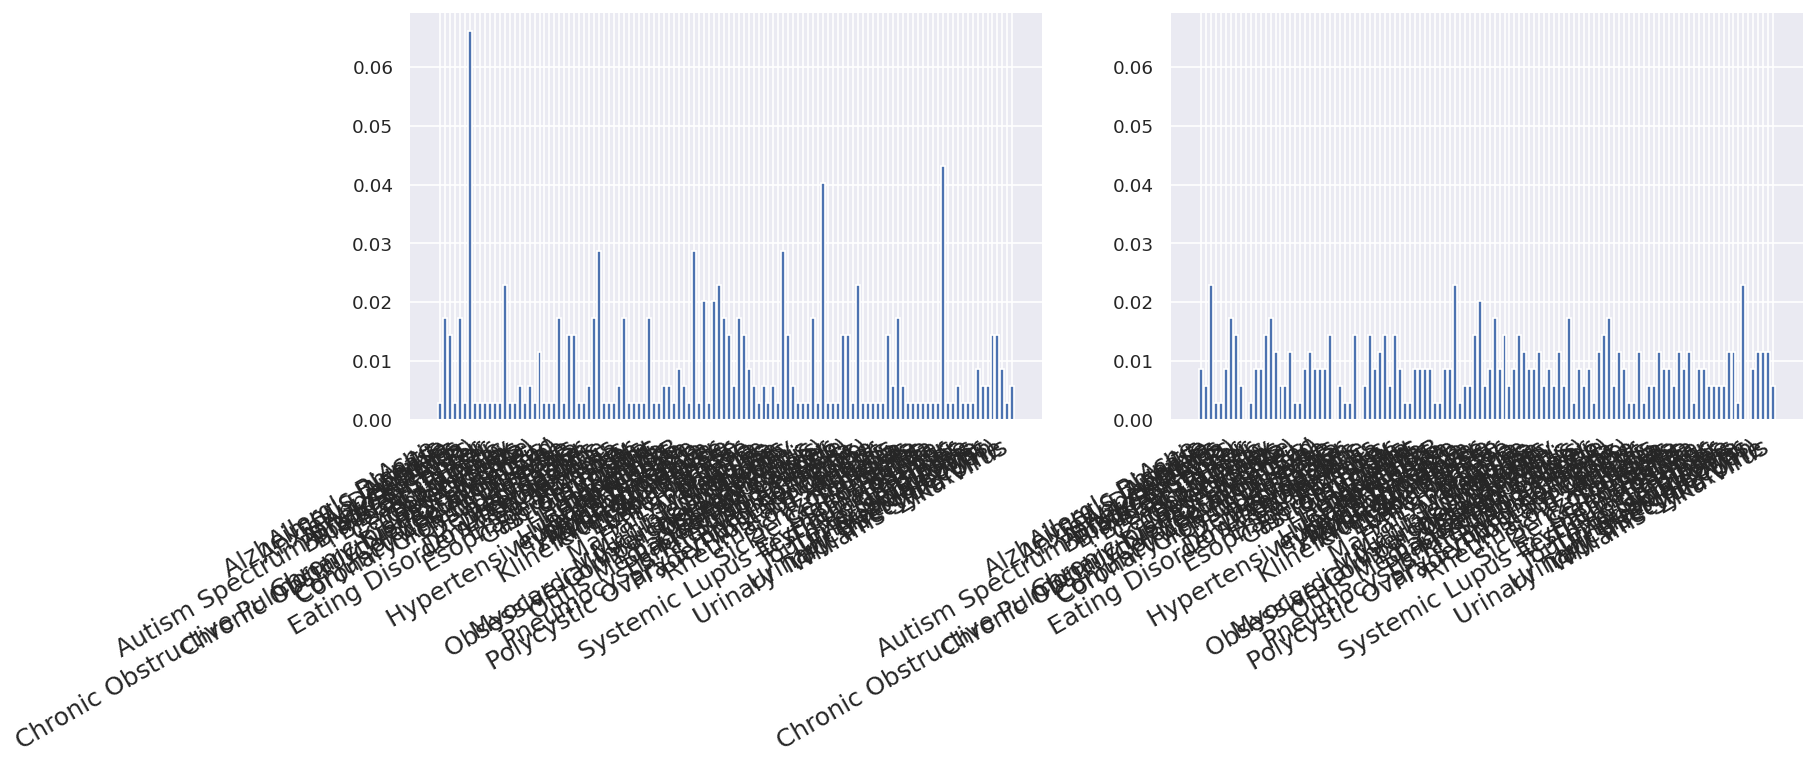

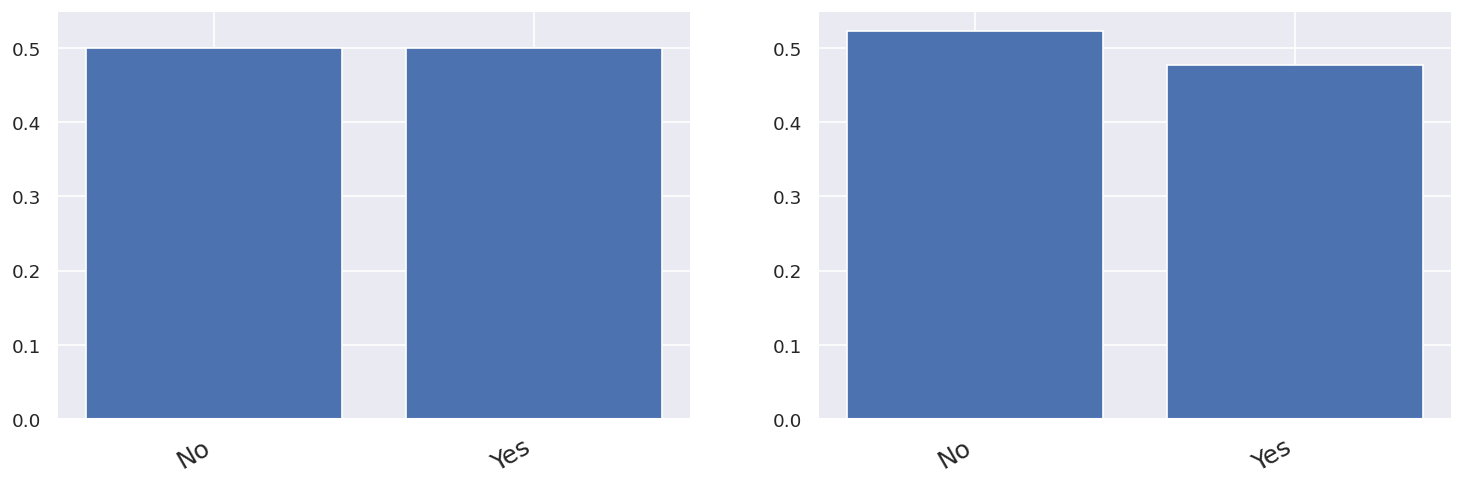

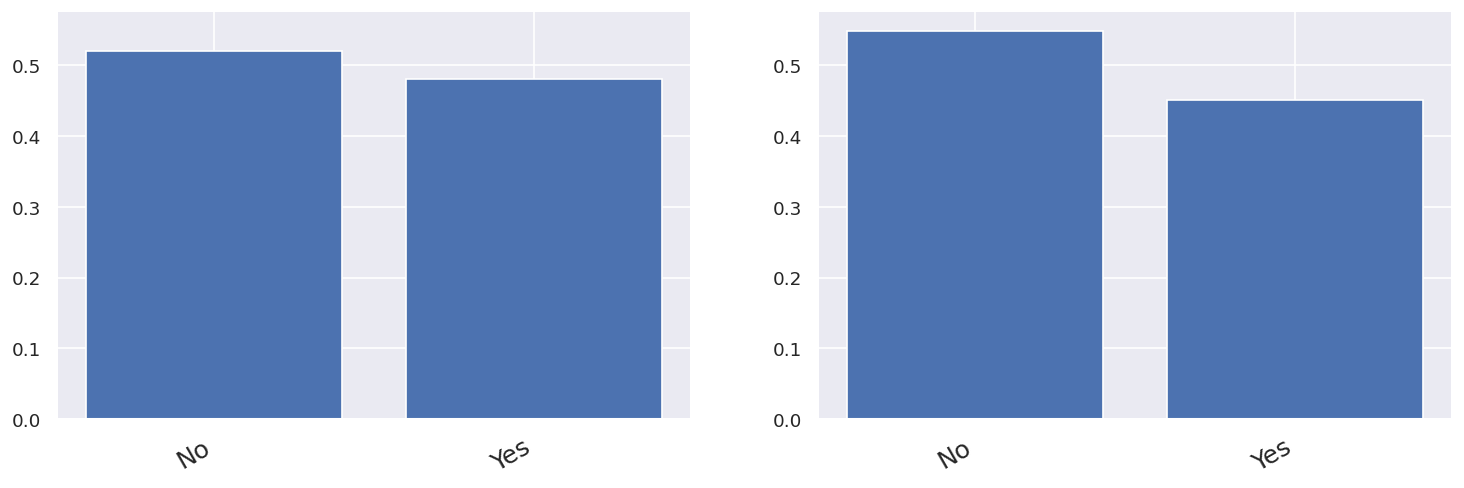

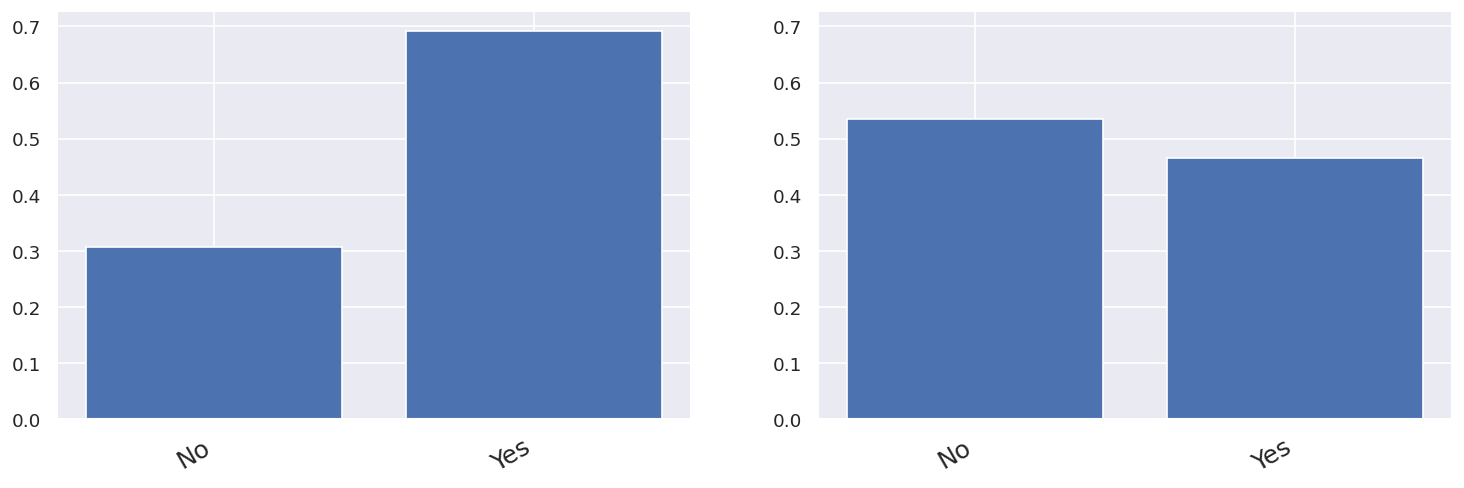

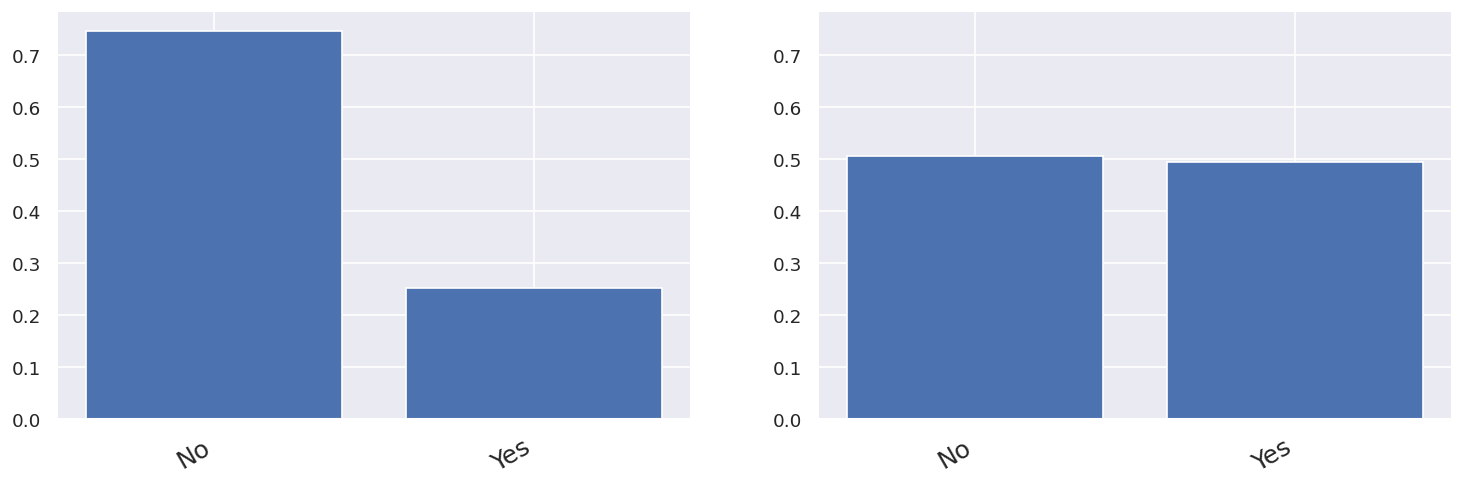

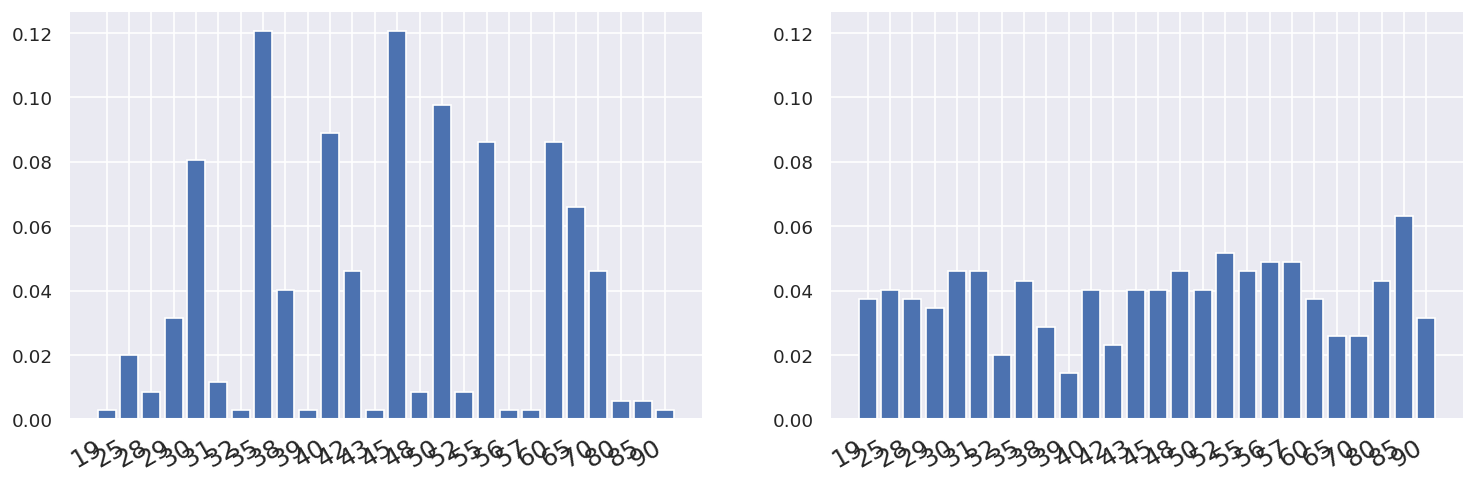

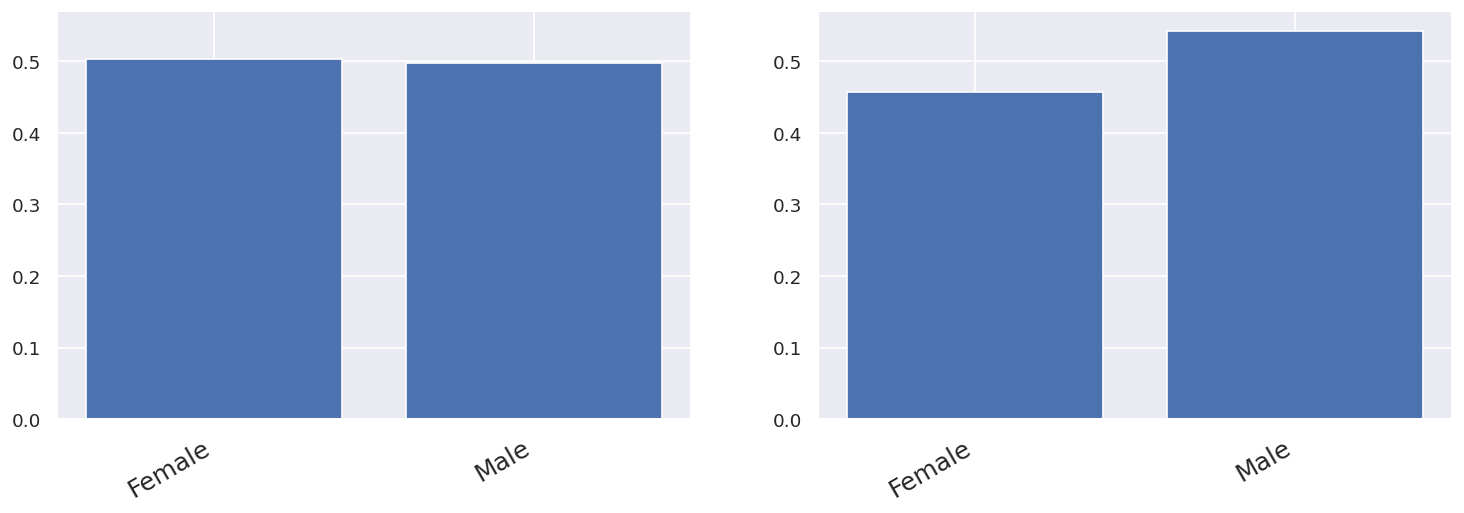

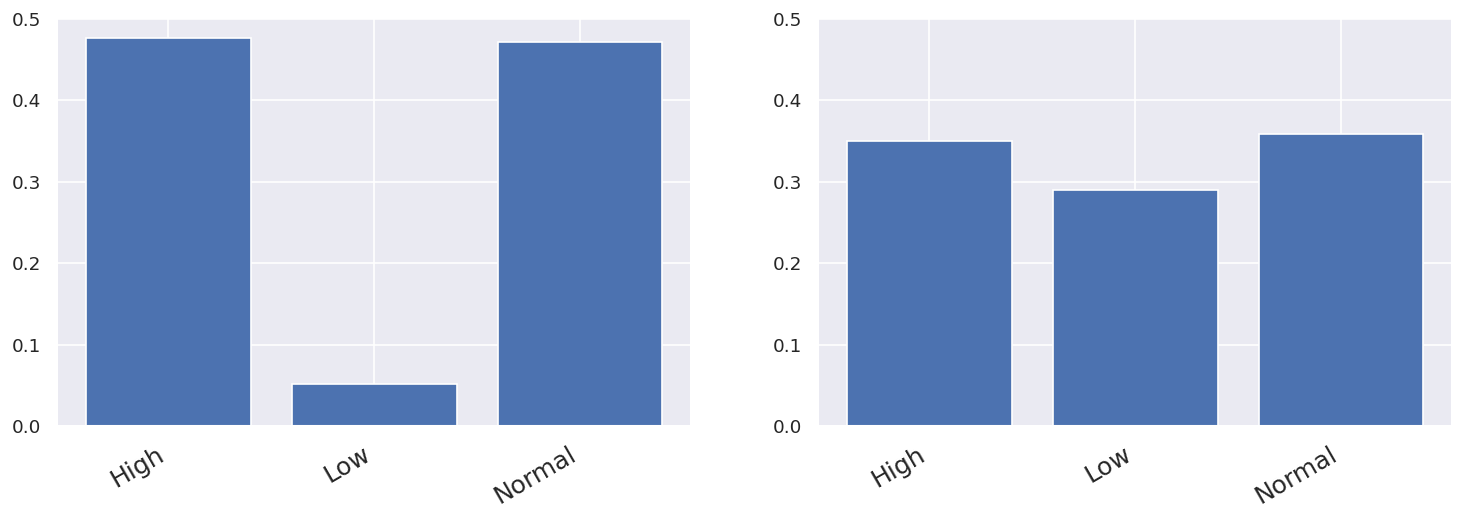

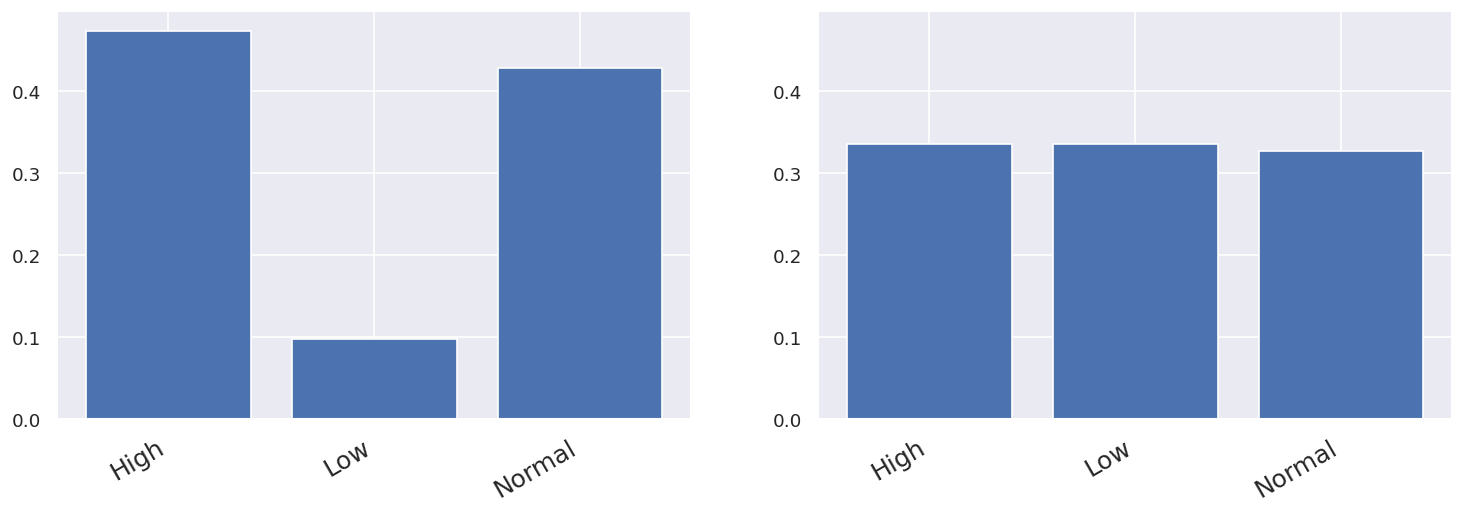

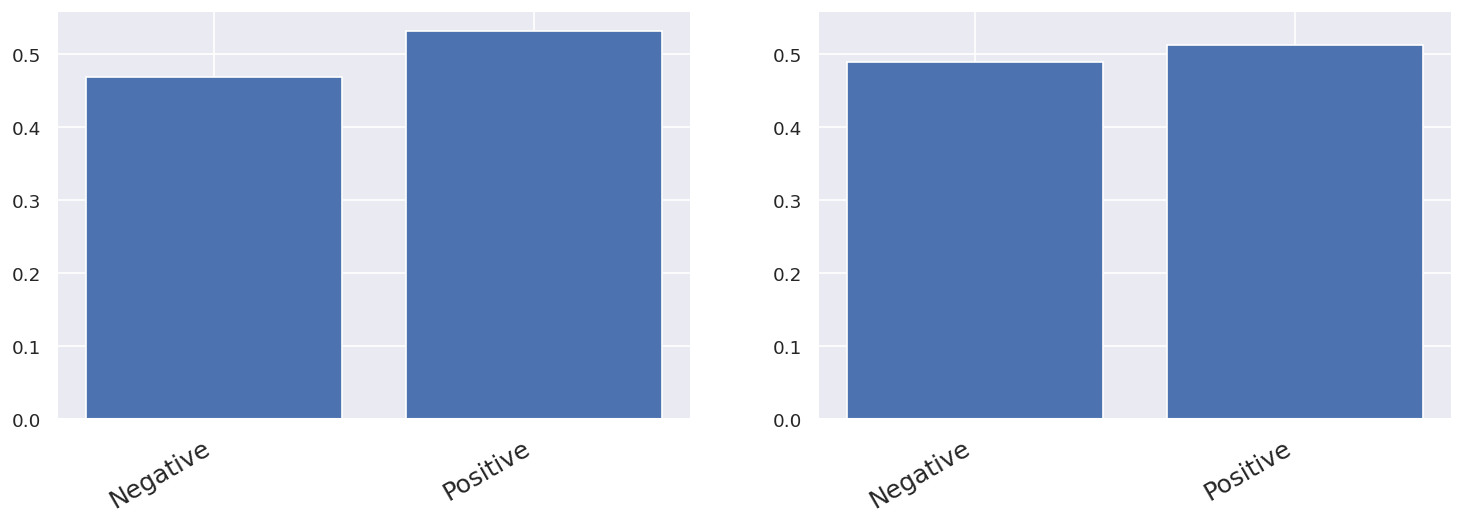

In [8]:
for attribute in synthetic_df.columns:
    inspector.compare_histograms(attribute)

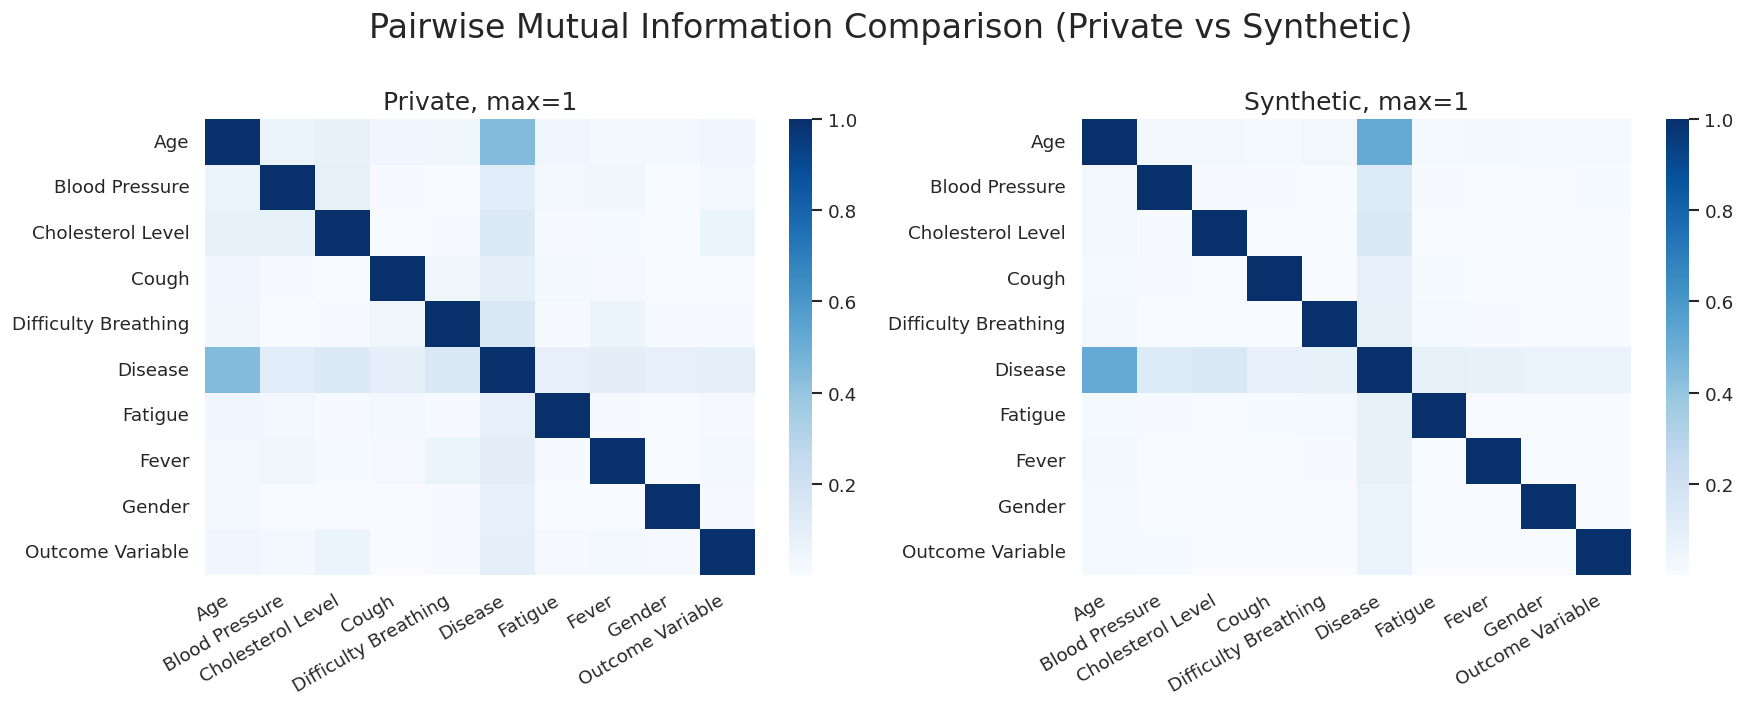

In [9]:
inspector.mutual_information_heatmap()